<a href="https://colab.research.google.com/github/lehuutrung1412/Machine_Learning/blob/main/Dimensionality_Reduction_For_Image_And_Audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Using PCA to compress image

## Download and read image

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from sklearn.decomposition import PCA
import numpy as np

In [ ]:
!wget https://media.doanhnghiepvn.vn/Images/Uploaded/Share/2020/09/02/Nhan-dien-phuc-tuong-troi-cho-tren-khuon-mat-nguoi-dan-ong-phu-nu-lay-duoc-co-the-suong-mot-doi_2.jpg -O image.jpg

--2021-10-09 02:24:45--  https://media.doanhnghiepvn.vn/Images/Uploaded/Share/2020/09/02/Nhan-dien-phuc-tuong-troi-cho-tren-khuon-mat-nguoi-dan-ong-phu-nu-lay-duoc-co-the-suong-mot-doi_2.jpg
Resolving media.doanhnghiepvn.vn (media.doanhnghiepvn.vn)... 115.146.127.9
Connecting to media.doanhnghiepvn.vn (media.doanhnghiepvn.vn)|115.146.127.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49606 (48K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>]  48.44K  45.2KB/s    in 1.1s    

2021-10-09 02:24:47 (45.2 KB/s) - ‘image.jpg’ saved [49606/49606]



In [ ]:
image = cv2.imread('image.jpg', 0)

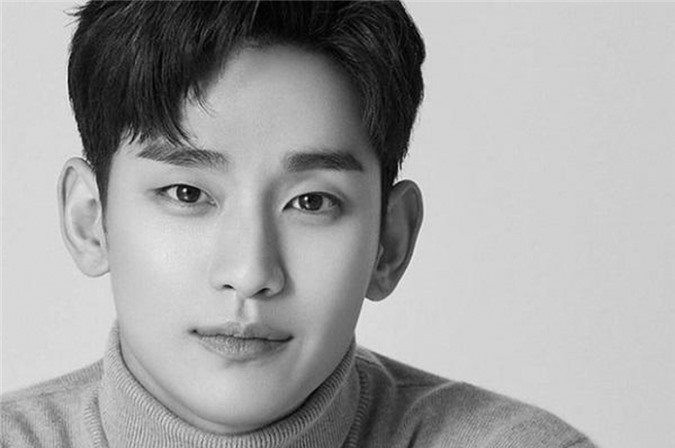

In [ ]:
cv2_imshow(image)

In [ ]:
image.shape

(448, 675)

## PCA for dimensionality reduction

In [ ]:
pca = PCA(n_components=50)
reduced = pca.fit_transform(image)

In [ ]:
pca.components_.shape

(50, 675)

In [ ]:
image_result = pca.inverse_transform(reduced)

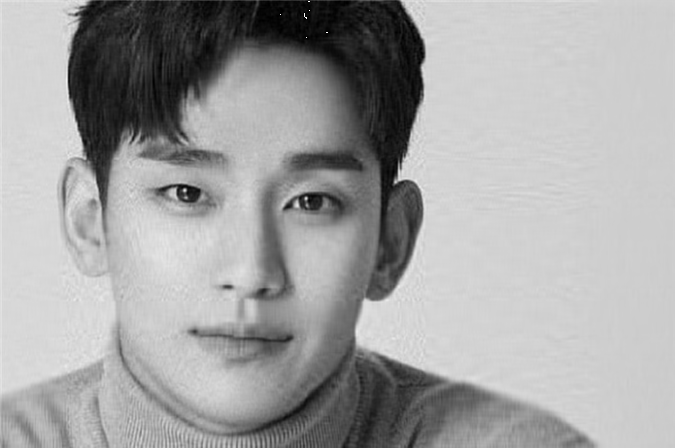

In [ ]:
cv2_imshow(image_result.astype(np.uint8))

# 2. Audio Compression

In [ ]:
from IPython.display import Audio
from scipy.io import wavfile
import matplotlib.pyplot as plt

In [ ]:
audio_file = '/content/drive/MyDrive/Study Documents/CS116 - Python Programming for ML/music.wav'

In [ ]:
rate, data = wavfile.read(audio_file)
length = 10 # get only 10s
start = 0
end = start + rate * length
Audio(data=data[start:end, 0], rate=rate)

In [ ]:
data.shape

(4939840, 2)

In [ ]:
total_length = data.shape[0] / rate
print(f"Total length of audio = {total_length:.0f}s")

Total length of audio = 112s


/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


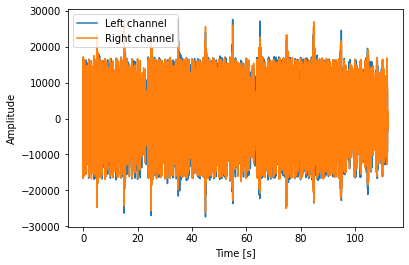

In [ ]:
time = np.linspace(0., total_length, data.shape[0])
plt.plot(time, data[:, 0], label="Left channel")
plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
# Because audio in left channel and right channel are the same, so we just take 1 channel to demo the reduction
data_left_channel = data[:, 0]

In [ ]:
def pca_reduce_audio(signal, n_components, block_size=512):
    
    # First, remove the remainder of the signal so that it is divisible by the block_size
    len_signal = len(signal)
    remainder = len_signal % block_size
    signal = signal[:(len_signal - remainder)]
    
    # Reshape the signal to have block_size dimensions
    reshaped = signal.reshape((len(signal) // block_size, block_size))
    
    # Second, do the PCA process
    pca = PCA(n_components=n_components)
    pca.fit(reshaped)
    
    transformed = pca.transform(reshaped)
    reconstructed = pca.inverse_transform(transformed).reshape((len(signal)))
    return pca, transformed, reconstructed

In [ ]:
# Do PCA process and listen reconstruct audio
_, _, reconstructed = pca_reduce_audio(data_left_channel, n_components=100)
Audio(data=reconstructed[start:end], rate=rate)

In [ ]:
# Different number components = 50
_, _, reconstructed = pca_reduce_audio(data_left_channel, n_components=50)
Audio(data=reconstructed[start:end], rate=rate)

In [ ]:
# Different number components = 200
_, _, reconstructed = pca_reduce_audio(data_left_channel, n_components=200)
Audio(data=reconstructed[start:end], rate=rate)